In [1]:
import warnings
warnings.filterwarnings("ignore") 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv("adult_dataset.csv")
df.head()

age workclass  fnlwgt     education  education.num marital.status  \
0   90         ?   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66         ?  186061  Some-college             10        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   

          occupation   relationship   race     sex  capital.gain  \
0                  ?  Not-in-family  White  Female             0   
1    Exec-managerial  Not-in-family  White  Female             0   
2                  ?      Unmarried  Black  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   

   capital.loss  hours.per.week native.country income  
0          4356              40  United-States  <=50K  
1          4356              18  United-States  <=50K  
2          4356              40  United-States  <=50K  
3          3900              40  United-States  <=50K  
4          3900              40  United-States  <=50K

In [4]:
df.shape

(32561, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [7]:
# Check all clumns having "?"
corrupt=[i for i in df.columns if "?" in df[i].unique()]
corrupt

['workclass', 'occupation', 'native.country']

In [8]:
# Lets count the number of "? as well"
cnt=0
for i in corrupt:
    work_idx=np.where(df[i]=="?")
    cnt=df.iloc[work_idx].shape[0]
    print("{} Num of ? is:- {}".format(i,cnt))

workclass Num of ? is:- 1836
occupation Num of ? is:- 1843
native.country Num of ? is:- 583


In [9]:
# Since count is quite low we delete these rows
work_idx=np.where(df["workclass"]=="?")
work_idx

(array([    0,     2,    14, ..., 32541, 32543, 32544], dtype=int64),)

In [10]:
work_idx[0]

array([    0,     2,    14, ..., 32541, 32543, 32544], dtype=int64)

In [11]:
df.drop(work_idx[0],axis=0,inplace=True)

In [12]:
df.shape

(30725, 15)

In [13]:
# Check for "?" in Workflow
df[df["workclass"]=="?"]

Empty DataFrame
Columns: [age, workclass, fnlwgt, education, education.num, marital.status, occupation, relationship, race, sex, capital.gain, capital.loss, hours.per.week, native.country, income]
Index: []

### For occupation 

In [14]:
occ_idx= df[df["occupation"]=="?"].index
occ_idx

Int64Index([8874, 13675, 17089, 21934, 24483, 32331, 32338], dtype='int64')

In [15]:
df.drop(occ_idx,axis=0,inplace=True)

In [16]:
df[df["occupation"]=="?"]

Empty DataFrame
Columns: [age, workclass, fnlwgt, education, education.num, marital.status, occupation, relationship, race, sex, capital.gain, capital.loss, hours.per.week, native.country, income]
Index: []

### For native.country

In [17]:
nat_idx=df[df["native.country"]=="?"].index
nat_idx

Int64Index([    9,    18,    65,    86,    87,   132,   148,   150,   240,
              429,
            ...
            31804, 31889, 32022, 32254, 32268, 32428, 32459, 32476, 32498,
            32515],
           dtype='int64', length=556)

In [18]:
df.drop(nat_idx,axis=0,inplace=True)

In [19]:
df[df["native.country"]=="?"]

Empty DataFrame
Columns: [age, workclass, fnlwgt, education, education.num, marital.status, occupation, relationship, race, sex, capital.gain, capital.loss, hours.per.week, native.country, income]
Index: []

In [20]:
df.shape

(30162, 15)

In [21]:
# Lets count the number of "? again"
cnt=0
for i in corrupt:
    work_idx=np.where(df[i]=="?")
    cnt=df.iloc[work_idx].shape[0]
    print("{} Num of ? is:- {}".format(i,cnt))

workclass Num of ? is:- 0
occupation Num of ? is:- 0
native.country Num of ? is:- 0


# Alternatively we can also do


In [22]:
df1=pd.read_csv("adult_dataset.csv")
df1.head(2)

age workclass  fnlwgt education  education.num marital.status  \
0   90         ?   77053   HS-grad              9        Widowed   
1   82   Private  132870   HS-grad              9        Widowed   

        occupation   relationship   race     sex  capital.gain  capital.loss  \
0                ?  Not-in-family  White  Female             0          4356   
1  Exec-managerial  Not-in-family  White  Female             0          4356   

   hours.per.week native.country income  
0              40  United-States  <=50K  
1              18  United-States  <=50K

In [23]:
len(df[df["workclass"]!="?"])

30162

## Data Preparation


There are a number of preprocessing steps we need to do before building the model. 

Firstly, note that we have both categorical and numeric features as predictors. In previous models such as linear and logistic regression, we had created **dummy variables** for categorical variables, since those models (being mathematical equations) can  process only numeric variables.

All that is not required in decision trees, since they can process categorical variables easily. However, we still need to **encode the categorical variables** into a standard format so that sklearn can understand them and build the tree. We'll do that using the ```LabelEncoder()``` class, which comes with ```sklearn.preprocessing```. 

You can read the documentation of ```LabelEncoder``` <a href="http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html">here</a>.

In [24]:
from sklearn import preprocessing

In [25]:
# Select categorial variables
df_cats=[i for i in df.columns if df[i].dtype=="O"]
df_cats

['workclass',
 'education',
 'marital.status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native.country',
 'income']

In [26]:
df.select_dtypes(include="object").head()

workclass     education marital.status         occupation   relationship  \
1   Private       HS-grad        Widowed    Exec-managerial  Not-in-family   
3   Private       7th-8th       Divorced  Machine-op-inspct      Unmarried   
4   Private  Some-college      Separated     Prof-specialty      Own-child   
5   Private       HS-grad       Divorced      Other-service      Unmarried   
6   Private          10th      Separated       Adm-clerical      Unmarried   

    race     sex native.country income  
1  White  Female  United-States  <=50K  
3  White  Female  United-States  <=50K  
4  White  Female  United-States  <=50K  
5  White  Female  United-States  <=50K  
6  White    Male  United-States  <=50K

In [27]:
# Apply Label encoder
le=preprocessing.LabelEncoder()
df_cat=df[df_cats].apply(le.fit_transform)
df_cat.head()

workclass  education  marital.status  occupation  relationship  race  sex  \
1          2         11               6           3             1     4    0   
3          2          5               0           6             4     4    0   
4          2         15               5           9             3     4    0   
5          2         11               0           7             4     4    0   
6          2          0               5           0             4     4    1   

   native.country  income  
1              38       0  
3              38       0  
4              38       0  
5              38       0  
6              38       0

In [28]:
# drop and concat with the original dataset
df.drop(df_cats,axis=1,inplace=True)
df=pd.concat([df,df_cat],axis=1)
df.head()

age  fnlwgt  education.num  capital.gain  capital.loss  hours.per.week  \
1   82  132870              9             0          4356              18   
3   54  140359              4             0          3900              40   
4   41  264663             10             0          3900              40   
5   34  216864              9             0          3770              45   
6   38  150601              6             0          3770              40   

   workclass  education  marital.status  occupation  relationship  race  sex  \
1          2         11               6           3             1     4    0   
3          2          5               0           6             4     4    0   
4          2         15               5           9             3     4    0   
5          2         11               0           7             4     4    0   
6          2          0               5           0             4     4    1   

   native.country  income  
1              38       0  
3              38       0  
4              38       0  
5              38       0  
6              38       0

In [29]:
df.shape

(30162, 15)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 1 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             30162 non-null  int64
 1   fnlwgt          30162 non-null  int64
 2   education.num   30162 non-null  int64
 3   capital.gain    30162 non-null  int64
 4   capital.loss    30162 non-null  int64
 5   hours.per.week  30162 non-null  int64
 6   workclass       30162 non-null  int32
 7   education       30162 non-null  int32
 8   marital.status  30162 non-null  int32
 9   occupation      30162 non-null  int32
 10  relationship    30162 non-null  int32
 11  race            30162 non-null  int32
 12  sex             30162 non-null  int32
 13  native.country  30162 non-null  int32
 14  income          30162 non-null  int32
dtypes: int32(9), int64(6)
memory usage: 2.6 MB


In [31]:
# convert target variable income to categorical
df["income"]=df["income"].astype("category")

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 1 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             30162 non-null  int64   
 1   fnlwgt          30162 non-null  int64   
 2   education.num   30162 non-null  int64   
 3   capital.gain    30162 non-null  int64   
 4   capital.loss    30162 non-null  int64   
 5   hours.per.week  30162 non-null  int64   
 6   workclass       30162 non-null  int32   
 7   education       30162 non-null  int32   
 8   marital.status  30162 non-null  int32   
 9   occupation      30162 non-null  int32   
 10  relationship    30162 non-null  int32   
 11  race            30162 non-null  int32   
 12  sex             30162 non-null  int32   
 13  native.country  30162 non-null  int32   
 14  income          30162 non-null  category
dtypes: category(1), int32(8), int64(6)
memory usage: 2.6 MB


### Model Building and Evaluation
* Let's first build a decision tree with default hyperparameters. Then we'll use cross-validation to tune them.

In [33]:
# Train test split
from sklearn.model_selection import train_test_split

In [34]:
# Putting feature variable to X
y=df.pop("income")

# Putting response variable to y
X=df

# Train test split

In [35]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=99)
X_train.head()

age  fnlwgt  education.num  capital.gain  capital.loss  hours.per.week  \
24351   42  289636              9             0             0              46   
15626   37   52465              9             0             0              40   
4347    38  125933             14             0             0              40   
23972   44  183829             13             0             0              38   
26843   35  198841             11             0             0              35   

       workclass  education  marital.status  occupation  relationship  race  \
24351          2         11               2          13             0     4   
15626          1         11               4           7             1     4   
4347           0         12               2           9             0     4   
23972          5          9               4           0             1     4   
26843          2          8               0          12             3     4   

       sex  native.country  
24351    1              38  
15626    1              38  
4347     1              19  
23972    0              38  
26843    1              38

# Model building

In [36]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_1=DecisionTreeClassifier(max_depth=5)
dt=dt_1.fit(X_train,y_train)
dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [37]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

# Making prediction
y_pred=dt.predict(X_test)
# Printing classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.95      0.91      6867
           1       0.78      0.52      0.63      2182

    accuracy                           0.85      9049
   macro avg       0.82      0.74      0.77      9049
weighted avg       0.84      0.85      0.84      9049



In [38]:
# Accuracy and confusion matrix
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[6553  314]
 [1038 1144]]
0.8505912255497845


### Plotting the Decision Tree

To visualise decision trees in python, you need to install certain external libraries. You can read about the process in detail here: http://scikit-learn.org/stable/modules/tree.html

We need the ```graphviz``` library to plot a tree.

In [39]:
# Importing required packages for visualization
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

In [40]:
# Putting features
features = list(df.columns)
features

['age',
 'fnlwgt',
 'education.num',
 'capital.gain',
 'capital.loss',
 'hours.per.week',
 'workclass',
 'education',
 'marital.status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native.country']

In [41]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz/bin/' 


In [42]:
# plotting tree with max_depth=3
dot_data = StringIO()  
export_graphviz(dt, out_file=dot_data,
                feature_names=features, filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_pdf("income_pred.pdf")

True

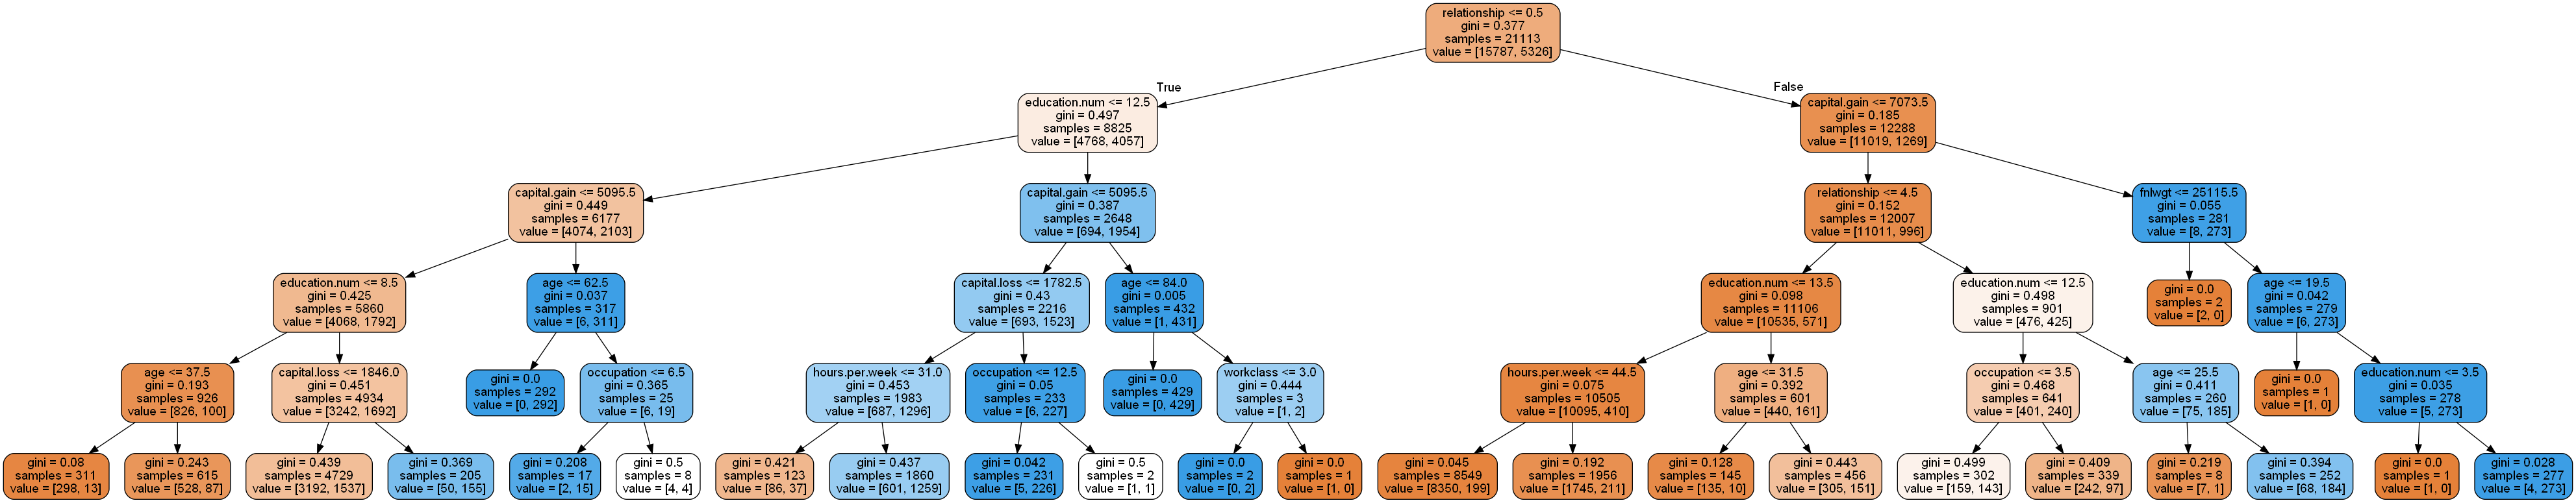

In [43]:
# Show graph
Image(graph.create_png())

### Hyperparameter Tuning

The default tree is quite complex, and we need to simplify it by tuning the hyperparameters. 

First, let's understand the parameters in a decision tree. You can read this in the documentation using ```help(DecisionTreeClassifier)```.


- **criterion** (Gini/IG or entropy): It defines the function to measure the quality of a split. Sklearn supports “gini” criteria for Gini Index & “entropy” for Information Gain. By default, it takes the value “gini”.
- **splitter**: It defines the strategy to choose the split at each node. Supports “best” value to choose the best split & “random” to choose the best random split. By default, it takes “best” value.
- **max_features**: It defines the no. of features to consider when looking for the best split. We can input integer, float, string & None value.
    - If an integer is inputted then it considers that value as max features at each split.
    - If float value is taken then it shows the percentage of features at each split.
    - If “auto” or “sqrt” is taken then max_features=sqrt(n_features).
    - If “log2” is taken then max_features= log2(n_features).
    - If None, then max_features=n_features. By default, it takes “None” value.
- **max_depth**: The max_depth parameter denotes maximum depth of the tree. It can take any integer value or None. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples. By default, it takes “None” value.
- **min_samples_split**: This tells above the minimum no. of samples reqd. to split an internal node. If an integer value is taken then consider min_samples_split as the minimum no. If float, then it shows percentage. By default, it takes “2” value.
- **min_samples_leaf**: The minimum number of samples required to be at a leaf node. If an integer value is taken then consider - -min_samples_leaf as the minimum no. If float, then it shows percentage. By default, it takes “1” value.
- **max_leaf_nodes**: It defines the maximum number of possible leaf nodes. If None then it takes an unlimited number of leaf nodes. By default, it takes “None” value.
- **min_impurity_split**: It defines the threshold for early stopping tree growth. A node will split if its impurity is above the threshold otherwise it is a leaf.<br>



### Tuning max_depth

Let's first try to find the optimum values for max_depth and understand how the value of max_depth affects the decision tree.

Here, we are creating a dataframe with max_depth in range 1 to 80 and checking the accuracy score corresponding to each max_depth. 

To reiterate, a grid search scheme consists of:

    - an estimator (classifier such as SVC() or decision tree)
    - a parameter space
    - a method for searching or sampling candidates (optional) 
    - a cross-validation scheme, and
    - a score function (accuracy, roc_auc etc.)

In [44]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(1, 40)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters,return_train_score=True,
                    cv=n_folds, 
                   scoring="accuracy")
tree.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=100,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': range(1, 40)}, pre_dispatch='2*n_jobs',
 

In [45]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.046170      0.036580         0.004998        0.000631   
1       0.043173      0.006612         0.005398        0.001854   
2       0.057164      0.006520         0.005198        0.001165   
3       0.075153      0.008371         0.005198        0.000979   
4       0.082351      0.007386         0.005395        0.000798   

  param_max_depth            params  split0_test_score  split1_test_score  \
0               1  {'max_depth': 1}           0.747810           0.747810   
1               2  {'max_depth': 2}           0.812219           0.818612   
2               3  {'max_depth': 3}           0.828558           0.834241   
3               4  {'max_depth': 4}           0.832583           0.840871   
4               5  {'max_depth': 5}           0.834241           0.844897   

   split2_test_score  split3_test_score  ...  mean_test_score  std_test_score  \
0           0.747573           0.747750  ...         0.747738        0.000087   
1           0.820507           0.825675  ...         0.819969        0.004538   
2           0.834478           0.836570  ...         0.834273        0.003115   
3           0.842529           0.842729  ...         0.840193        0.003860   
4           0.847265           0.842729  ...         0.843319        0.004858   

   rank_test_score  split0_train_score  split1_train_score  \
0               39            0.747721            0.747721   
1               16            0.821906            0.820308   
2               12            0.835998            0.834577   
3                9            0.841622            0.839491   
4                7            0.844287            0.844227   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.747780            0.747735            0.747735   
1            0.819834            0.818542            0.819253   
2            0.834458            0.833758            0.833758   
3            0.844997            0.838908            0.845421   
4            0.849319            0.841572            0.849683   

   mean_train_score  std_train_score  
0          0.747738         0.000022  
1          0.819969         0.001134  
2          0.834510         0.000819  
3          0.842088         0.002707  
4          0.845818         0.003165  

[5 rows x 21 columns]

### Viualization

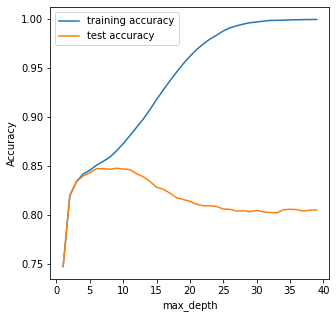

In [46]:
# plotting accuracies with max_depth
plt.figure(figsize=(5,5))
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


You can see that as we increase the value of max_depth, both training and test score increase till about max-depth = 10, after which the test score gradually reduces. Note that the scores are average accuracies across the 5-folds. 

Thus, it is clear that the model is overfitting the training data if the max_depth is too high. Next, let's see how the model behaves with other hyperparameters.

### Tuning min_samples_leaf

The hyperparameter **min_samples_leaf** indicates the minimum number of samples required to be at a leaf.<br>

So if the values of min_samples_leaf is less, say 5, then the will be constructed even if a leaf has 5, 6 etc. observations (and is likely to overfit).<br>

Let's see what will be the optimum value for min_samples_leaf.

In [47]:
from sklearn.model_selection import KFold,GridSearchCV

# specify number of folds for k-fold CV
n_folds=5

# parameters to build the model on
parameters ={"min_samples_leaf":range(5,200,20)}

# instantiate the model
dtree =  DecisionTreeClassifier(criterion="gini",random_state=100)

# fit tree on training data
tree =GridSearchCV(dtree,parameters,cv=n_folds,return_train_score=True,scoring="accuracy")

tree.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=100,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'min_samples_leaf': range(5, 200, 20)},
             p

In [48]:
# scores of GridSearch CV
scores =tree.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.149906      0.024577         0.004199        0.000400   
1       0.114934      0.004041         0.004798        0.002134   
2       0.111223      0.014484         0.003796        0.000747   
3       0.108576      0.012512         0.004398        0.001355   
4       0.109344      0.018456         0.004198        0.000398   

  param_min_samples_leaf                    params  split0_test_score  \
0                      5   {'min_samples_leaf': 5}           0.825716   
1                     25  {'min_samples_leaf': 25}           0.841819   
2                     45  {'min_samples_leaf': 45}           0.843003   
3                     65  {'min_samples_leaf': 65}           0.841108   
4                     85  {'min_samples_leaf': 85}           0.838030   

   split1_test_score  split2_test_score  split3_test_score  ...  \
0           0.827848           0.819560           0.826149  ...   
1           0.851291           0.839451           0.842018  ...   
2           0.849159           0.846555           0.851018  ...   
3           0.852711           0.845371           0.851492  ...   
4           0.849159           0.845371           0.851492  ...   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.823616        0.003696               10            0.915335   
1         0.844788        0.004651                6            0.868028   
2         0.848293        0.003194                1            0.861042   
3         0.845830        0.005589                2            0.857549   
4         0.845214        0.004834                3            0.853108   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.911782            0.915335            0.912083   
1            0.869686            0.871226            0.867503   
2            0.860154            0.862581            0.860399   
3            0.855773            0.858555            0.855189   
4            0.853108            0.855654            0.854005   

   split4_train_score  mean_train_score  std_train_score  
0            0.913149          0.913537         0.001537  
1            0.869872          0.869263         0.001343  
2            0.863714          0.861578         0.001362  
3            0.858149          0.857043         0.001328  
4            0.854597          0.854095         0.000963  

[5 rows x 21 columns]

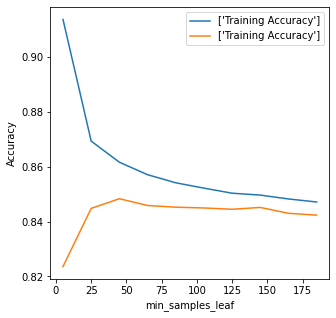

In [49]:
# plotting accuracies with min_samples_leaf
plt.figure(figsize=(5,5))
plt.plot(scores["param_min_samples_leaf"],
        scores["mean_train_score"],
        label=["Training Accuracy"])
plt.plot(scores["param_min_samples_leaf"],
        scores["mean_test_score"],
        label=["Training Accuracy"])
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

You can see that at low values of min_samples_leaf, the tree gets a bit overfitted. At values > 100, however, the model becomes more stable and the training and test accuracy start to converge.

### Tuning min_samples_split

The hyperparameter **min_samples_split** is the minimum no. of samples required to split an internal node. Its default value is 2, which means that even if a node is having 2 samples it can be furthur divided into leaf nodes.

In [50]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters,return_train_score=True,
                    cv=n_folds, 
                   scoring="accuracy")
tree.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=100,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'min_samples_split': range(5, 200, 20)},
             

In [51]:
# scores of GridSearch CV
scores =tree.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.170356      0.018815         0.004198        0.000398   
1       0.155618      0.022444         0.004294        0.000749   
2       0.151543      0.020161         0.004795        0.001165   
3       0.154997      0.030362         0.004407        0.001034   
4       0.134806      0.024134         0.003398        0.000488   

  param_min_samples_split                     params  split0_test_score  \
0                       5   {'min_samples_split': 5}           0.811982   
1                      25  {'min_samples_split': 25}           0.825006   
2                      45  {'min_samples_split': 45}           0.835188   
3                      65  {'min_samples_split': 65}           0.839451   
4                      85  {'min_samples_split': 85}           0.846081   

   split1_test_score  split2_test_score  split3_test_score  ...  \
0           0.811035           0.818376           0.811701  ...   
1           0.825243           0.830215           0.822596  ...   
2           0.839687           0.830215           0.827333  ...   
3           0.845844           0.837556           0.833728  ...   
4           0.853895           0.838977           0.837281  ...   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.812296        0.003296               10            0.969094   
1         0.826126        0.002581                9            0.906927   
2         0.834225        0.004783                8            0.890527   
3         0.840098        0.004360                7            0.883896   
4         0.844314        0.005898                6            0.877383   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.969331            0.969509            0.970458   
1            0.906513            0.906986            0.906577   
2            0.890053            0.889816            0.888521   
3            0.882238            0.883245            0.880765   
4            0.877442            0.879515            0.875081   

   split4_train_score  mean_train_score  std_train_score  
0            0.971227          0.969924         0.000800  
1            0.911847          0.907770         0.002047  
2            0.896335          0.891051         0.002725  
3            0.884258          0.882880         0.001261  
4            0.880706          0.878025         0.001940  

[5 rows x 21 columns]

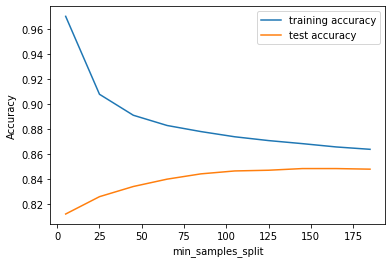

In [52]:
plt.figure()
plt.plot(scores["param_min_samples_split"],
        scores["mean_train_score"],
        label="training accuracy")
plt.plot(scores["param_min_samples_split"],
        scores["mean_test_score"],
        label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

This shows that as you increase the min_samples_split, the tree overfits lesser since the model is less complex.

## Grid Search to Find Optimal Hyperparameters

We can now use GridSearchCV to find multiple optimal hyperparameters together. Note that this time, we'll also specify the criterion (gini/entropy or IG).

In [53]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds=5
# Instantiate the grid search model
dtree=DecisionTreeClassifier()

grid_search=GridSearchCV(estimator=dtree,param_grid=param_grid,cv=n_folds,
                         return_train_score=True,verbose=1)
# Fit the grid search to the data
grid_search.fit(X_train,y_train)


Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    8.1s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['entropy', 'gini'],
                   

In [54]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.075600      0.004435         0.003998        0.000632   
1       0.072133      0.002901         0.003399        0.000492   
2       0.071039      0.005273         0.003416        0.000475   
3       0.080365      0.014037         0.003997        0.000630   
4       0.123254      0.009877         0.004196        0.000747   

  param_criterion param_max_depth param_min_samples_leaf  \
0         entropy               5                     50   
1         entropy               5                     50   
2         entropy               5                    100   
3         entropy               5                    100   
4         entropy              10                     50   

  param_min_samples_split                                             params  \
0                      50  {'criterion': 'entropy', 'max_depth': 5, 'min_...   
1                     100  {'criterion': 'entropy', 'max_depth': 5, 'min_...   
2                      50  {'criterion': 'entropy', 'max_depth': 5, 'min_...   
3                     100  {'criterion': 'entropy', 'max_depth': 5, 'min_...   
4                      50  {'criterion': 'entropy', 'max_depth': 10, 'min...   

   split0_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0           0.834241  ...         0.841804        0.004173               13   
1           0.834241  ...         0.841804        0.004173               13   
2           0.834241  ...         0.841615        0.004157               15   
3           0.834241  ...         0.841615        0.004157               15   
4           0.842529  ...         0.849903        0.004456                3   

   split0_train_score  split1_train_score  split2_train_score  \
0            0.843991            0.841445            0.842333   
1            0.843991            0.841445            0.842333   
2            0.843991            0.841267            0.842333   
3            0.843991            0.841267            0.842333   
4            0.854648            0.853404            0.854589   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0            0.841158            0.847552          0.843296         0.002346  
1            0.841158            0.847552          0.843296         0.002346  
2            0.841158            0.846960          0.843142         0.002163  
3            0.841158            0.846960          0.843142         0.002163  
4            0.852288            0.855485          0.854083         0.001116  

[5 rows x 24 columns]

In [55]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.8510400232064759
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


**Running the model with best parameters obtained from grid search.**

In [56]:
# model with optimal hyperparameters
clf_gini =DecisionTreeClassifier(criterion="gini",
                                 max_depth=10,min_samples_leaf=50,min_samples_split=50,
                                random_state=100)
clf_gini.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [57]:
# accuracy score
clf_gini.score(X_test,y_test)

0.850922753895458

In [58]:
clf_gini.score(X_train,y_train)

0.8564391607066736

In [59]:
from sklearn import tree
#tree.plot_tree(clf_gini)

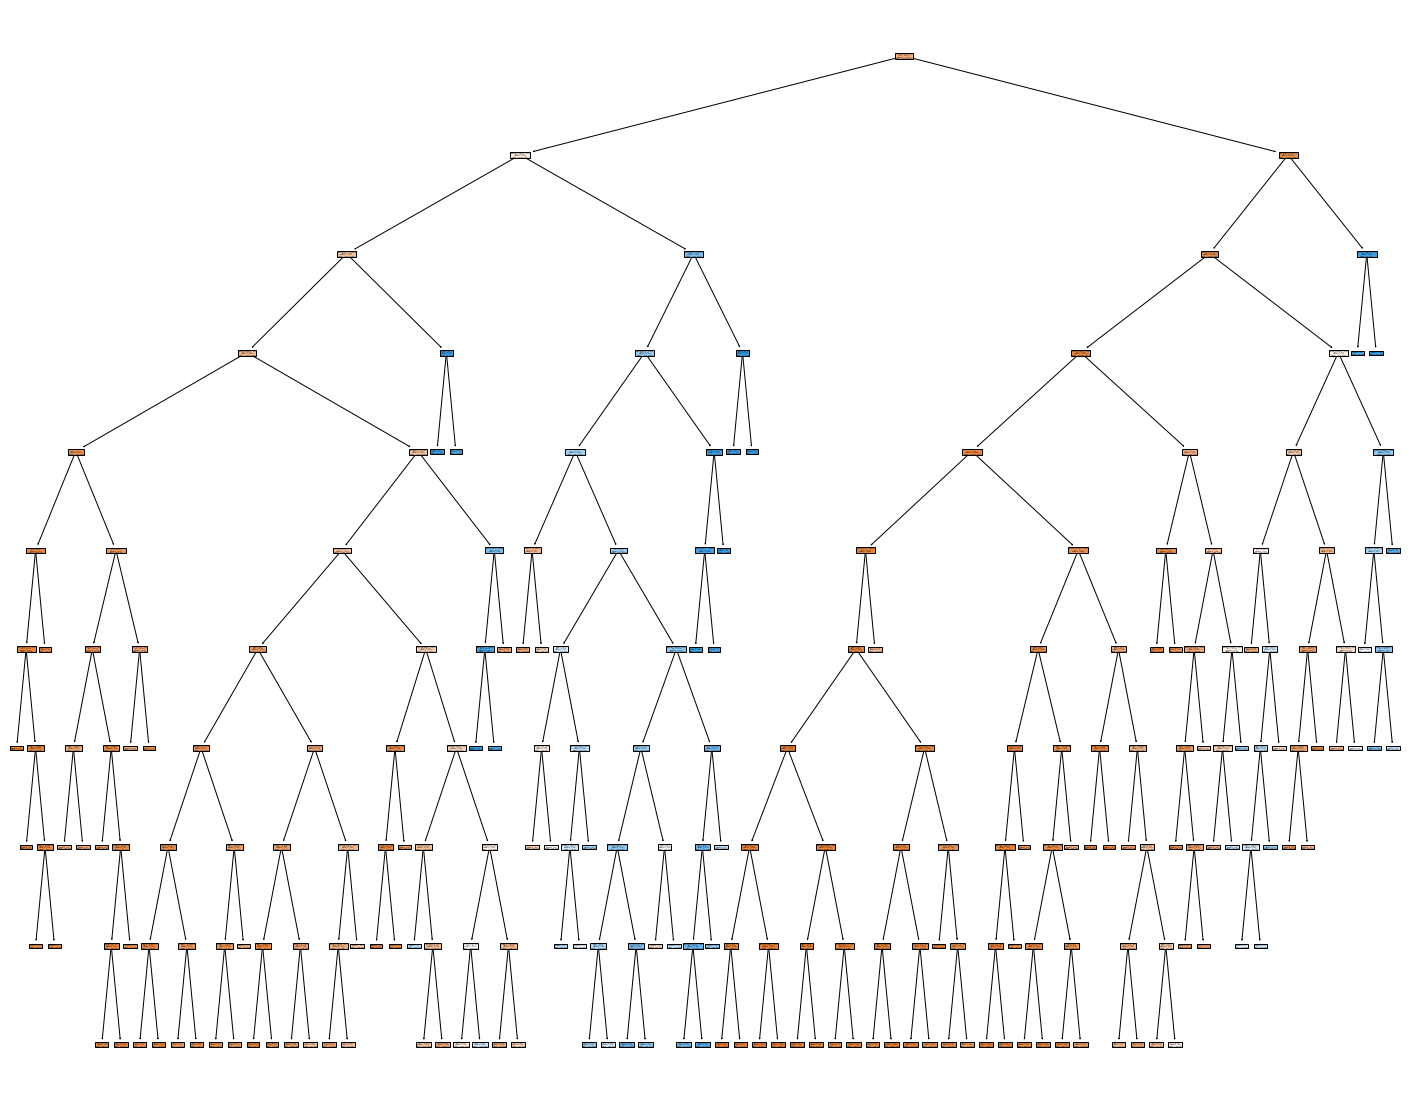

In [60]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf_gini, 
                   feature_names=features,
                   filled=True)

## Alternatively

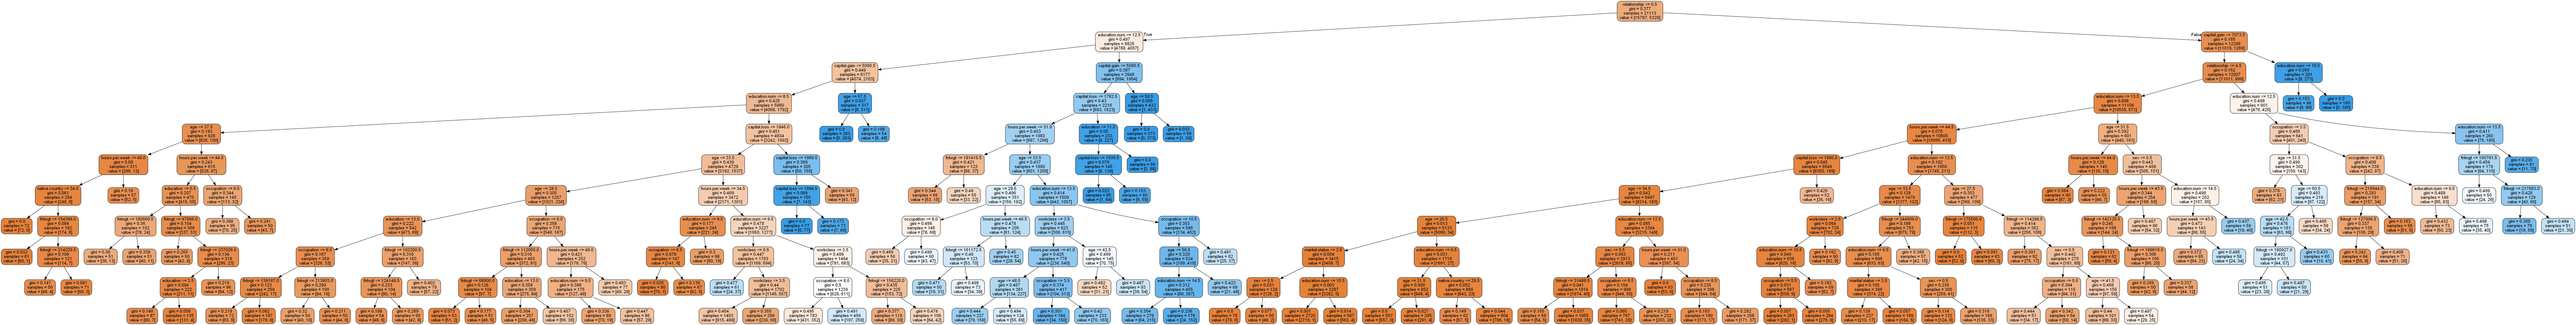

In [61]:
# plotting the tree
dot_data = StringIO()  
export_graphviz(clf_gini, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

You can see that this tree is too complex to understand. Let's try reducing the max_depth and see how the tree looks.

In [62]:
# tree with max_depth = 3
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=3, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)
clf_gini.fit(X_train, y_train)

# score
print(clf_gini.score(X_test,y_test))

0.8393192617968837


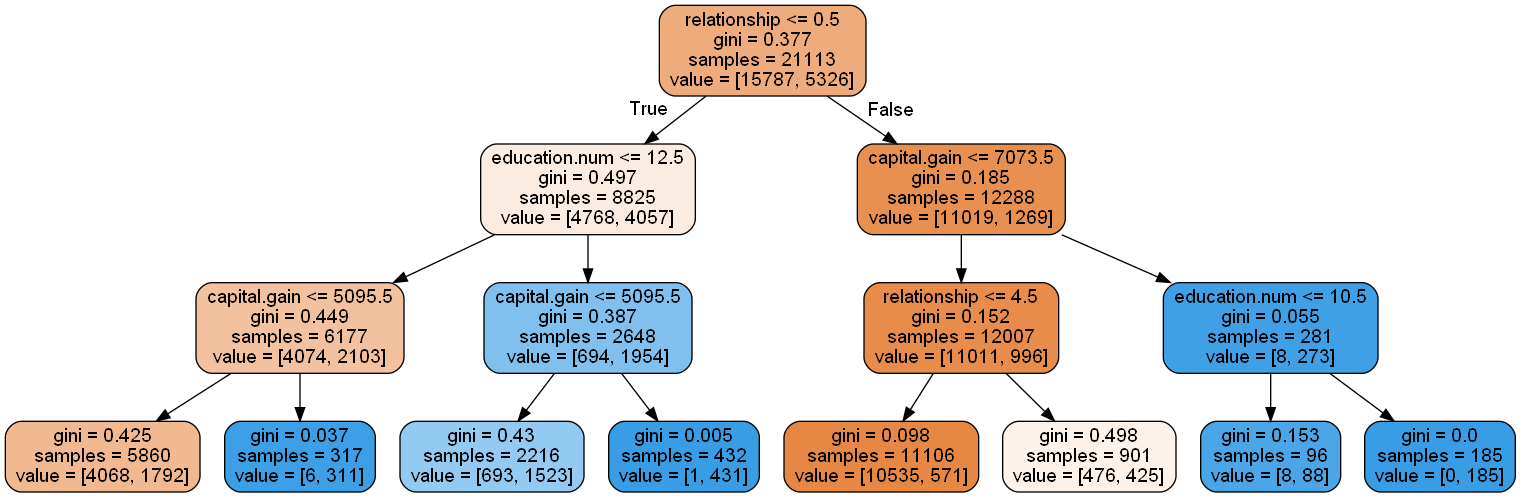

In [63]:
# plotting tree with max_depth=3
dot_data = StringIO()  
export_graphviz(clf_gini, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [64]:
# classification metrics
from sklearn.metrics import classification_report,confusion_matrix
y_pred = clf_gini.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90      6867
           1       0.77      0.47      0.59      2182

    accuracy                           0.84      9049
   macro avg       0.81      0.71      0.74      9049
weighted avg       0.83      0.84      0.82      9049



## plotting tree with all details

[Text(558.0, 380.52, 'relationship <= 0.5\ngini = 0.377\nsamples = 21113\nvalue = [15787, 5326]\nclass = 0'),
 Text(279.0, 271.8, 'education.num <= 12.5\ngini = 0.497\nsamples = 8825\nvalue = [4768, 4057]\nclass = 0'),
 Text(139.5, 163.07999999999998, 'capital.gain <= 5095.5\ngini = 0.449\nsamples = 6177\nvalue = [4074, 2103]\nclass = 0'),
 Text(69.75, 54.360000000000014, 'gini = 0.425\nsamples = 5860\nvalue = [4068, 1792]\nclass = 0'),
 Text(209.25, 54.360000000000014, 'gini = 0.037\nsamples = 317\nvalue = [6, 311]\nclass = 1'),
 Text(418.5, 163.07999999999998, 'capital.gain <= 5095.5\ngini = 0.387\nsamples = 2648\nvalue = [694, 1954]\nclass = 1'),
 Text(348.75, 54.360000000000014, 'gini = 0.43\nsamples = 2216\nvalue = [693, 1523]\nclass = 1'),
 Text(488.25, 54.360000000000014, 'gini = 0.005\nsamples = 432\nvalue = [1, 431]\nclass = 1'),
 Text(837.0, 271.8, 'capital.gain <= 7073.5\ngini = 0.185\nsamples = 12288\nvalue = [11019, 1269]\nclass = 0'),
 Text(697.5, 163.07999999999998, 'rel

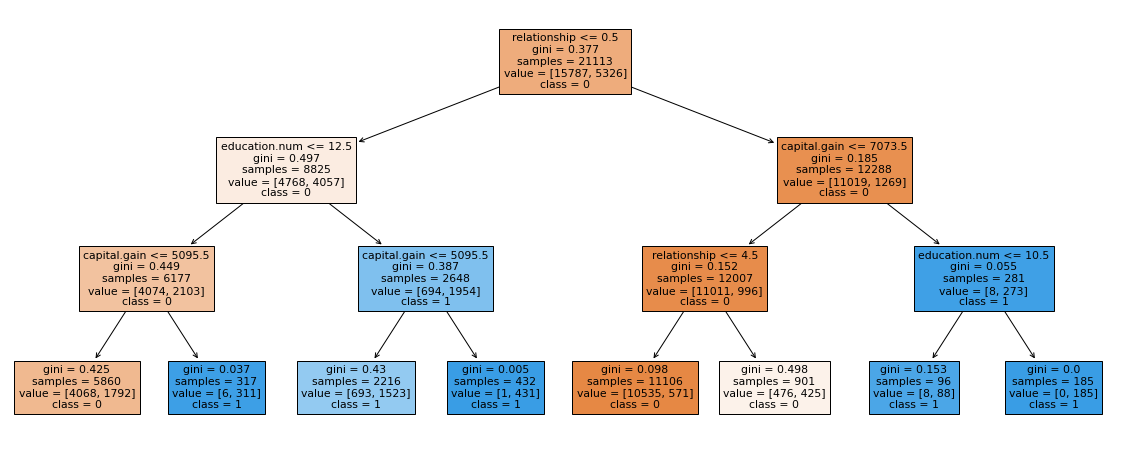

In [65]:
plt.figure(figsize=(20,8))
tree.plot_tree(clf_gini,filled=True,feature_names=X_train.columns,class_names=[str(i) for i in set(y_train)])

# Post Pruning techniques

**cost_complexity_pruning_path**

In [67]:
dt_cost=DecisionTreeClassifier(criterion="gini",random_state=100)
dt_cost

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [73]:
path=dt_cost.cost_complexity_pruning_path(X_train,y_train)
ccp_alpha=path.ccp_alphas

In [77]:
dt_model=[]
for i in ccp_alpha:
    dt_1 = DecisionTreeClassifier(ccp_alpha=i)
    dt_1.fit(X_train,y_train)
    dt_model.append(dt_1)
dt_model

[DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=None, splitter='best'),
 DecisionTreeClassifier(ccp_alpha=2.2892688548919297e-05, class_weight=None,
                        criterion='gini', max_depth=None, max_features=None,
                        max_leaf_nodes=None, min_impurity_decrease=0.0,
                        min_impurity_split=None, min_samples_leaf=1,
                        min_samples_split=2, min_weight_fraction_leaf=0.0,
                        presort='deprecated', random_state=None,
                        splitter='best'),
 DecisionTreeClassifier(ccp_alpha=2.3353173663409098e-05, class_weight=None,
            

In [78]:
train_score=[i.score(X_train,y_train) for i in dt_model]
test_score=[i.score(X_test,y_test) for i in dt_model]

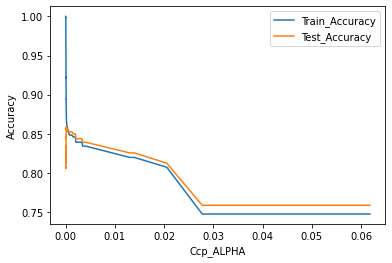

In [79]:
plt.figure()
plt.plot(ccp_alpha,train_score,label="Train_Accuracy")
plt.plot(ccp_alpha,test_score,label="Test_Accuracy")
plt.xlabel("Ccp_ALPHA")
plt.ylabel("Accuracy")
plt.legend()

In [80]:
dt_new_ccp=DecisionTreeClassifier(ccp_alpha=.0011)
dt_new_ccp.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0011, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [81]:
dt_new_ccp.score(X_train,y_train)

0.8483872495618813

In [82]:
dt_new_ccp.score(X_test,y_test)

0.8525803956238258

[Text(683.55, 564.74, 'relationship <= 0.5\ngini = 0.377\nsamples = 21113\nvalue = [15787, 5326]\nclass = 0'),
 Text(418.5, 498.30000000000007, 'education.num <= 12.5\ngini = 0.497\nsamples = 8825\nvalue = [4768, 4057]\nclass = 0'),
 Text(223.2, 431.86, 'capital.gain <= 5095.5\ngini = 0.449\nsamples = 6177\nvalue = [4074, 2103]\nclass = 0'),
 Text(167.39999999999998, 365.4200000000001, 'education.num <= 8.5\ngini = 0.425\nsamples = 5860\nvalue = [4068, 1792]\nclass = 0'),
 Text(111.6, 298.98, 'gini = 0.193\nsamples = 926\nvalue = [826, 100]\nclass = 0'),
 Text(223.2, 298.98, 'capital.loss <= 1846.0\ngini = 0.451\nsamples = 4934\nvalue = [3242, 1692]\nclass = 0'),
 Text(111.6, 232.54000000000008, 'age <= 33.5\ngini = 0.439\nsamples = 4729\nvalue = [3192, 1537]\nclass = 0'),
 Text(55.8, 166.10000000000002, 'gini = 0.305\nsamples = 1257\nvalue = [1021, 236]\nclass = 0'),
 Text(167.39999999999998, 166.10000000000002, 'hours.per.week <= 34.5\ngini = 0.469\nsamples = 3472\nvalue = [2171, 130

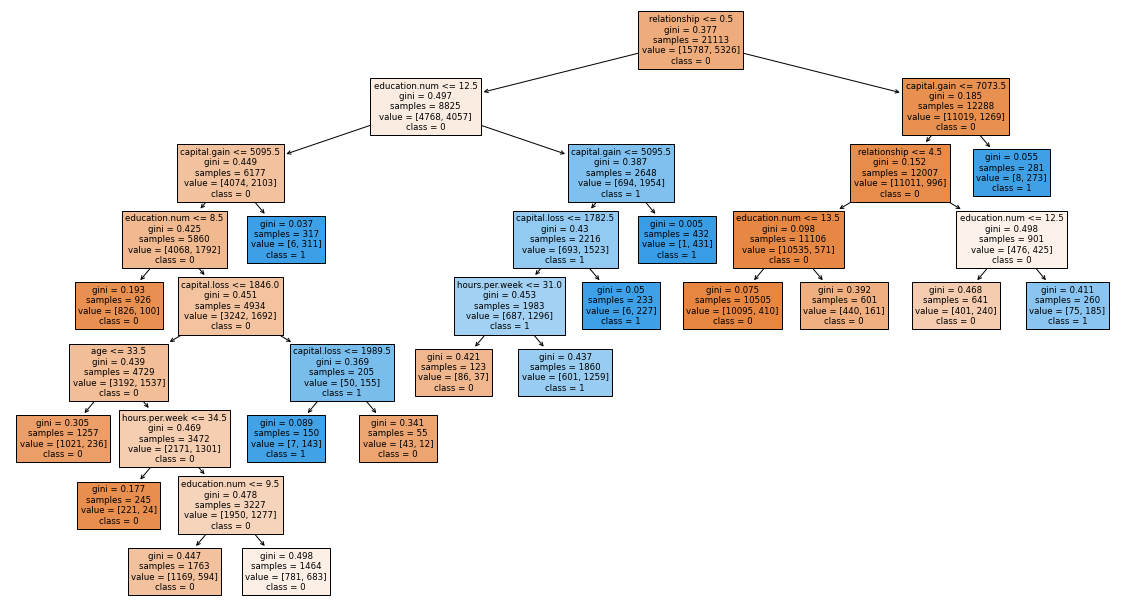

In [84]:
plt.figure(figsize=(20,11))
tree.plot_tree(dt_new_ccp,filled=True,feature_names=X_train.columns,class_names=[str(i) for i in set(y_train)])